In [33]:
import string, re, nltk, os
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

In [2]:
# load the doc in memory
def load_doc(filename):
    f = open(filename)
    text = f.read(bin)
    f.close()
    return text

In [3]:
load_doc('datasets/review_polarity/txt_sentoken/pos/cv000_29590.txt')

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

In [4]:
from nltk.tokenize import word_tokenize
swords = stopwords.words('english')

In [6]:
# Function to clean the doc
def clean_doc(doc):
    tokens = word_tokenize(doc)
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in swords]
    tokens = [token for token in tokens if len(token) > 1]
    return tokens

In [7]:
sample_data = load_doc('datasets/review_polarity/txt_sentoken/pos/cv000_29590.txt')

In [8]:
clean_doc(sample_data)

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',
 'brothers',
 'direct',
 'seems',
 'al

In [10]:
# load the file, clean the data and return lines
def doc_to_line(filename):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    return ' '.join(tokens)

In [11]:
doc_to_line('datasets/review_polarity/txt_sentoken/pos/cv000_29590.txt')

'films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell starters created alan moore eddie campbell brought medium whole new level mid series called watchmen say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel pages long includes nearly consist nothing footnotes words dismiss film source get past whole comic book thing might find another stumbling block hell directors albert allen hughes getting hughes brothers direct seems almost ludicrous casting carrot top well anything riddle better direct film set ghetto features really violent street crime mad geniuses behind menace ii society ghetto question course whitechapel london east end filthy sooty place whores called unfortunates starting get little nervous mysterious psychopath carving profession surgical precision first stiff turns copper

In [12]:
f = open('datasets/vocab.txt')
vocab = f.read().split()
vocab

['sometimes',
 'tip',
 'hat',
 'film',
 'jump',
 'bandwagon',
 'enjoy',
 'ride',
 'saw',
 'truman',
 'show',
 'audience',
 'full',
 'teenagers',
 'doubt',
 'drawn',
 'ace',
 'ventura',
 'hoping',
 'see',
 'latest',
 'take',
 'fart',
 'jokes',
 'surprised',
 'may',
 'realized',
 'picture',
 'actually',
 'something',
 'say',
 'crowd',
 'id',
 'cant',
 'tell',
 'yet',
 'really',
 'good',
 'seems',
 'comparison',
 'awful',
 'mountain',
 'crap',
 'spewed',
 'forth',
 'bowls',
 'hollywood',
 'far',
 'year',
 'time',
 'alone',
 'make',
 'call',
 'end',
 'burbanks',
 'side',
 'concerned',
 'wanted',
 'win',
 'felt',
 'tribute',
 'jim',
 'carrey',
 'achieved',
 'legitimacy',
 'last',
 'best',
 'viewed',
 'cold',
 'little',
 'possible',
 'plot',
 'unless',
 'youre',
 'media',
 'blackout',
 'however',
 'probably',
 'know',
 'basics',
 'stars',
 'burbank',
 'everyman',
 'insurance',
 'agent',
 'living',
 'beautiful',
 'wife',
 'meryl',
 'laura',
 'linney',
 'south',
 'florida',
 'island',
 'town',

In [13]:
# load the file, clean the data and return lines
def doc_to_line(filename):
    doc = load_doc(filename)
    tokens = clean_doc(doc)
    tokens = [token for token in tokens if token in vocab]
    return ' '.join(tokens)

In [14]:
doc_to_line('datasets/review_polarity/txt_sentoken/pos/cv000_29590.txt')

'films adapted comic books plenty success whether superheroes batman superman spawn geared toward kids casper arthouse crowd ghost world never really comic book like hell starters created alan moore eddie campbell brought medium whole new level mid series called say moore campbell thoroughly subject jack ripper would like saying michael jackson starting look little odd book graphic novel pages long includes nearly consist nothing footnotes words dismiss film source get past whole comic book thing might find another stumbling block hell directors albert allen hughes getting hughes brothers direct seems almost ludicrous casting carrot top well anything better direct film set ghetto features really violent street crime mad geniuses behind menace ii society ghetto question course whitechapel london east end filthy place whores called unfortunates starting get little nervous mysterious psychopath carving profession surgical precision first stiff turns copper peter robbie coltrane world enou

In [15]:
os.listdir('datasets/review_polarity/txt_sentoken/pos')

['cv887_5126.txt',
 'cv192_14395.txt',
 'cv083_24234.txt',
 'cv426_10421.txt',
 'cv155_7308.txt',
 'cv627_11620.txt',
 'cv068_13400.txt',
 'cv232_14991.txt',
 'cv120_4111.txt',
 'cv738_10116.txt',
 'cv029_18643.txt',
 'cv661_2450.txt',
 'cv302_25649.txt',
 'cv210_9312.txt',
 'cv857_15958.txt',
 'cv675_21588.txt',
 'cv711_11665.txt',
 'cv771_28665.txt',
 'cv527_10123.txt',
 'cv568_15638.txt',
 'cv187_12829.txt',
 'cv769_8123.txt',
 'cv427_10825.txt',
 'cv972_26417.txt',
 'cv903_17822.txt',
 'cv651_10492.txt',
 'cv792_3832.txt',
 'cv450_7890.txt',
 'cv863_7424.txt',
 'cv764_11739.txt',
 'cv332_16307.txt',
 'cv982_21103.txt',
 'cv231_10425.txt',
 'cv321_12843.txt',
 'cv664_4389.txt',
 'cv772_12119.txt',
 'cv076_24945.txt',
 'cv715_18179.txt',
 'cv918_2693.txt',
 'cv445_25882.txt',
 'cv375_9929.txt',
 'cv418_14774.txt',
 'cv247_13142.txt',
 'cv414_10518.txt',
 'cv182_7281.txt',
 'cv804_10862.txt',
 'cv783_13227.txt',
 'cv500_10251.txt',
 'cv158_10390.txt',
 'cv999_13106.txt',
 'cv536_27134

In [18]:
# load all the files from directory
def process_train(directory):
    documents = []
    for filename in os.listdir(directory):
        if not filename.startswith('cv9'):
            path = directory + '/' + filename
            docs = load_doc(path)
            tokens = clean_doc(docs)
            documents.append(tokens)
    return documents

In [20]:
tr = process_train('datasets/review_polarity/txt_sentoken/pos/')

In [22]:
len(tr)

900

In [23]:
# load all the files from directory
def process_test(directory):
    documents = []
    for filename in os.listdir(directory):
        if filename.startswith('cv9'):
            path = directory + '/' + filename
            docs = load_doc(path)
            tokens = clean_doc(docs)
            documents.append(tokens)
    return documents

In [24]:
te = process_test('datasets/review_polarity/txt_sentoken/pos/')
len(te)

100

In [25]:
def process_docs(directory, is_train):
    documents = []
    for filename in os.listdir(directory):
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        path = directory + '/' + filename
        docs = load_doc(path)
        tokens = clean_doc(docs)
        documents.append(tokens)
    return documents

In [27]:
tr = process_docs('datasets/review_polarity/txt_sentoken/pos/', True)
len(tr)

900

In [28]:
te = process_docs('datasets/review_polarity/txt_sentoken/pos/', False)
len(te)

100

In [29]:
def load_data(is_train):
    neg = process_docs('datasets/review_polarity/txt_sentoken/neg/', is_train)
    pos = process_docs('datasets/review_polarity/txt_sentoken/pos/', is_train)
    docs = neg + pos
    labels = [0 for i in range((len(neg)))] + [1 for i in range((len(pos)))]
    return docs, labels

In [30]:
# load training data
train_data, train_labels = load_data(True)
# load testing data
test_data, test_labels = load_data(False)

In [31]:
len(train_data), len(train_labels)

(1800, 1800)

In [32]:
len(test_data), len(test_labels)

(200, 200)

In [34]:
np.unique(test_labels)

array([0, 1])

#### Data Preparation

In [47]:
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [48]:
tokenizer = create_tokenizer(train_data)

In [50]:
# encode the training data
x_train = tokenizer.texts_to_matrix(train_data)

In [51]:
x_train.shape

(1800, 36389)

In [54]:
len(tokenizer.word_index)

36388

In [55]:
# encode the training data
x_test = tokenizer.texts_to_matrix(test_data)

In [56]:
x_test.shape

(200, 36389)

#### Build the Model

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import plot_model

In [60]:
def define_model(n_words):
    model = Sequential()
    model.add(Input(shape=(n_words,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['accuracy'])
    return model

In [62]:
model = define_model(36389)

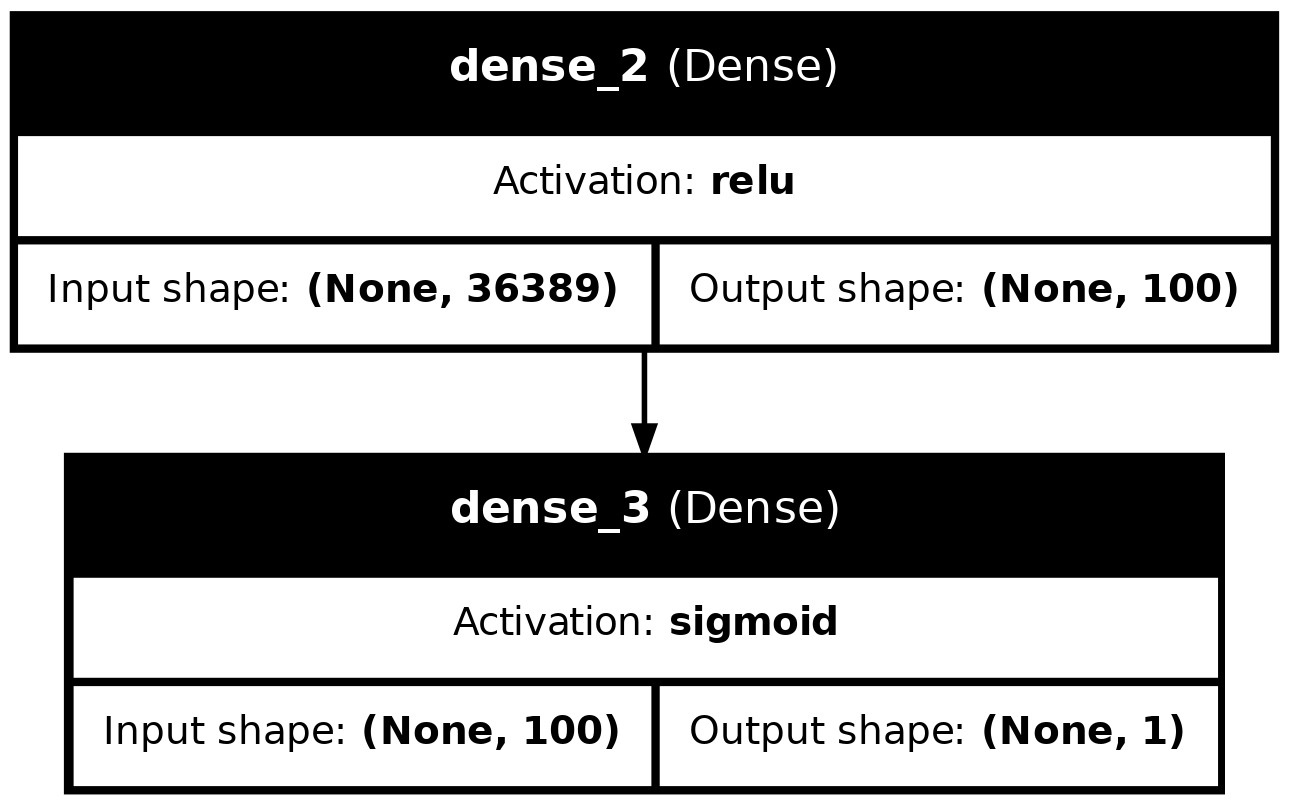

In [66]:
plot_model(model, show_layer_activations=True, show_layer_names=True,
          show_shapes=True)

#### Train the model

In [68]:
model.fit(x_train, np.array(train_labels), epochs=10, batch_size=5)

Epoch 1/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.7255 - loss: 0.5125
Epoch 2/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9994 - loss: 0.0286
Epoch 3/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 1.0000 - loss: 0.0029
Epoch 4/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 33ms/step - accuracy: 1.0000 - loss: 6.6081e-04
Epoch 5/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 1.0000 - loss: 6.5539e-04
Epoch 6/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 1.0000 - loss: 3.4829e-04
Epoch 7/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 1.0000 - loss: 9.4352e-05
Epoch 8/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 1.0000 - loss: 8.8378e-05
Epoch 9/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 1.0000 - loss: 3.1897e-05
Epoch 10/10
360/360 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 1.0000 - loss: 3.3275e-05


In [69]:
model.evaluate(x_test, np.array(test_labels), batch_size=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8786 - loss: 0.2270


[0.2301093488931656, 0.9049999713897705]

In [70]:
text1 = 'Best movie ever! It was great, I will definitely recommend it.'
text2 = 'This is the bad movie. Please dont watch it.'

In [94]:
def predict_sentiment(review):
    tokens = clean_doc(review)
    tokens = ' '.join(tokens)
    encoded = tokenizer.texts_to_matrix([tokens])
    yhat = model.predict(encoded)
    prob = yhat[0,0]
    if prob > 0.5:
        return 'Positive', prob
    return 'Negative', 1-prob

In [96]:
predict_sentiment(text1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


('Positive', 0.7157935)